<img src='../img/LogoWekeo_Copernicus_RGB_0.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='10%'></img>

# Copernicus Atmosphere Monitoring Service (CAMS) Global Reanalysis (EAC4) - Explore

The Copernicus Atmopshere Monitoring Service (CAMS) provides consistent and quality-controlled information related to air pollution and health and greenhouse gases. CAMS data consist of `global forecasts and analyses`, `global reanalyses (EAC4)`, `fire emissions` and `greenhouse gas flux inversions`.

This notebooks provides an introduction to the CAMS global reanalysis (EAC4) data. EAC4 (ECMWF Atmospheric Composition Reanalysis 4) is the 4th generation ECMWF global reanalysis of atmospheric composition. Reanalysis combines model data with observations from across the world into a globally complete and consistent dataset. As a trace gas for smoke and fires the variable `Organic Matter Aerosol Optical Depth` is used. Alternatively, you can use `Total Aerosol Optical Depth` or `Total Column Carbon Monoxide` to monitor fires. The specific example in this notebook features wildfires that occurred over central Siberia during August 2021.

#### Module outline
The module has the following outline:
* [1 - Load and browse organic matter aerosol optical depth (AOD) at 550nm](#load_browse)
* [2 - Retrieve the data variable organic matter AOD at 550nm as xarray DataArray](#data_retrieve)
* [4 - Visualize organic matter aerosol optical depth at 550nm](#visualize)
* [5 - Create a geographical subset for Australia](#subset)

<hr>

#### Load required libraries

In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes

#### Load helper functions

In [3]:
%run ../functions.ipynb

<hr>

### <a id='load_browse'></a>1. Load and browse `EAC4 reanalysis` data

CAMS global reanalysis data is available either in `GRIB` or `netCDF`. The data for this example has been downloaded as `netCDF` file. You can use xarray's function `xr.open_dataset()` to open the netCDF file as xarray Dataset.

*Note: the data is downloaded with a cryptic name starting with `adaptor.mars.internal...`. Hence, we advise you to rename the downloaded data file to e.g. `20210812_cams_eac_omaod.nc`.*

In [4]:
file = xr.open_dataset('./data/20210812_cams_eac_omaod.nc')
file

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 8)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2021-08-12 ... 2021-08-12T21:00:00
Data variables:
    omaod550   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-14 10:28:25 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

The data above has three dimensions (`latitude`, `longitude` and `time`) and one ata variables:
* `omaod550`: Organic matter Aerosol Optical Depth at 550nm

Let us inspect the coordinates of the file more in detail.

Below, you see that the dataset consists of eight time steps, we have data for every three hours on 12 August 2021.

In [5]:
file.time

<xarray.DataArray 'time' (time: 8)>
array(['2021-08-12T00:00:00.000000000', '2021-08-12T03:00:00.000000000',
       '2021-08-12T06:00:00.000000000', '2021-08-12T09:00:00.000000000',
       '2021-08-12T12:00:00.000000000', '2021-08-12T15:00:00.000000000',
       '2021-08-12T18:00:00.000000000', '2021-08-12T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-08-12 ... 2021-08-12T21:00:00
Attributes:
    long_name:  time

When we inspect the geographic coordinates, we see that the latitude and longitude values have a 0.25 degrees resolution and have a global coverage. Note that the longitude values are on a [0,360] grid instead of a [-180,180] grid. 

In [6]:
file.latitude, file.longitude

(<xarray.DataArray 'latitude' (latitude: 241)>
 array([ 90.  ,  89.25,  88.5 , ..., -88.5 , -89.25, -90.  ], dtype=float32)
 Coordinates:
   * latitude  (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
 Attributes:
     units:      degrees_north
     long_name:  latitude,
 <xarray.DataArray 'longitude' (longitude: 480)>
 array([  0.  ,   0.75,   1.5 , ..., 357.75, 358.5 , 359.25], dtype=float32)
 Coordinates:
   * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
 Attributes:
     units:      degrees_east
     long_name:  longitude)

### <a id='data_retrieve'></a>2. Retrieve the data variable `organic matter AOD at 550nm` as xarray DataArray

In a next step, let us load the data variable `organic matter AOD at 550nm` as xarray.DataArray. Let us name the variable `om_aod`.

In [7]:
om_aod = file.omaod550
om_aod

<xarray.DataArray 'omaod550' (time: 8, latitude: 241, longitude: 480)>
[925440 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2021-08-12 ... 2021-08-12T21:00:00
Attributes:
    units:      ~
    long_name:  Organic Matter Aerosol Optical Depth at 550nm

Above, you see that the variable `om_aod` has two attributes, `units` and `long_name`. Let us define variables for those attributes. The variables can be used later for the visualisation of the data.

In [8]:
long_name = om_aod.long_name
units = om_aod.units

Let us do the same for the coordinates `longitude` and `latitude`.

In [9]:
latitude = om_aod.latitude
longitude = om_aod.longitude

<br>

### <a id='visualize'></a>4. Visualize `organic matter aerosol optical depth at 550nm`

Now, we can visualise the dataset. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

You can make use of the variables we have defined above:
- `units`
- `long_name`
- `latitude`
- `longitude`

Additionally, you can specify the color scale and minimum and maxium data values.

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Organic Matter Aerosol Optical Depth at 550nm 2021-08-12T09:00:00.000000000'}>)

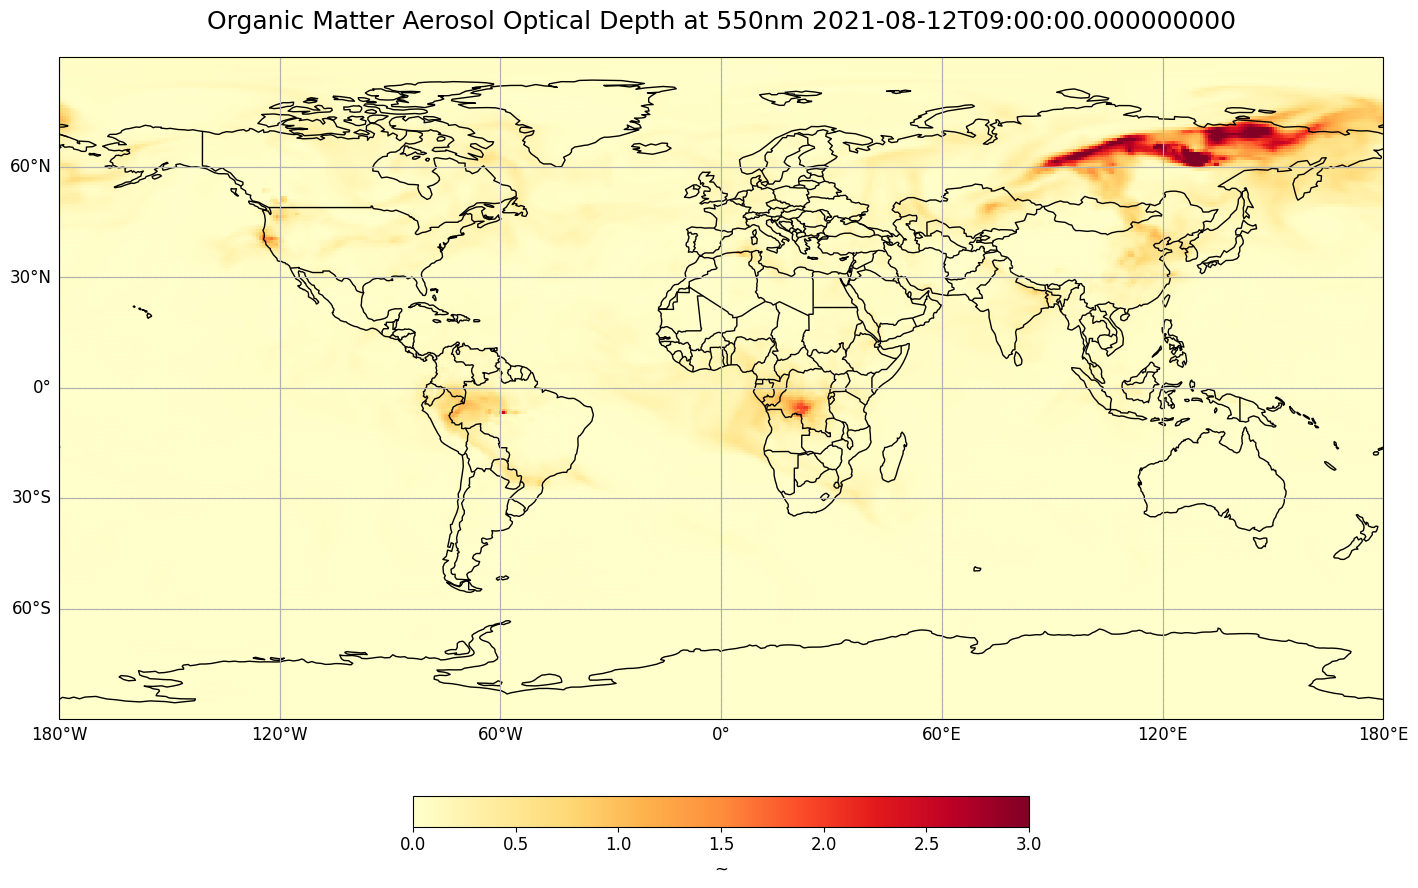

In [11]:
visualize_pcolormesh(data_array=om_aod[6,:,:], 
                     longitude=longitude, 
                     latitude=latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='YlOrRd', 
                     unit=units, 
                     long_name=long_name + ' ' + str(om_aod[3,:,:].time.data), 
                     vmin=0, 
                     vmax=3, 
                     set_global=True)


<hr>